In [8]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sb
import numpy as np
import pandas as pd
from textblob import TextBlob
import math
import datetime

Data Preprocessing
_____________________

In [9]:
df = pd.read_csv('netflix_titles.csv')  # load data from csv file
df.set_index('show_id', inplace=True)

In [10]:
df.shape

(8807, 11)

In [11]:
df.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Remove Duplicate from Data

In [13]:
def remove_duplication(data_f):
    if len(data_f[data_f.duplicated()]) != 0:
        data_f.drop_duplicates(inplace=True)
    return data_f


df = remove_duplication(data_f=df)

Dealing with null fields

In [14]:
df.isna()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,False,False,False,True,False,False,False,False,False,False,False
s2,False,False,True,False,False,False,False,False,False,False,False
s3,False,False,False,False,True,False,False,False,False,False,False
s4,False,False,True,True,True,False,False,False,False,False,False
s5,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
s8803,False,False,False,False,False,False,False,False,False,False,False
s8804,False,False,True,True,True,False,False,False,False,False,False
s8805,False,False,False,False,False,False,False,False,False,False,False


<Axes: ylabel='show_id'>

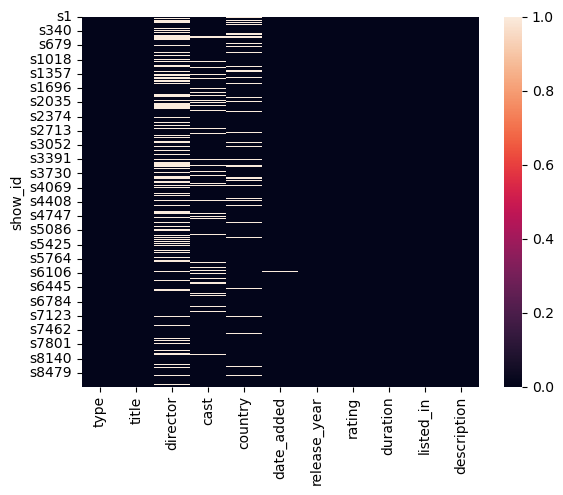

In [15]:
null_val_cols = df.isna().sum()
null_val_cols.to_csv('sum_of_nulls_in_columns.csv', encoding='utf-8', index=False)
null_val_cols
sb.heatmap(df.isna())

In [16]:
col_with_nan = df.columns[df.isna().any()].tolist()

for c in col_with_nan:
    df[c] = df[c].fillna('No item specified')

df.to_csv('netflix_titles_cleaned.csv')

Analysis
--------------------------------------------------------------------------

netflix popular content ratings of movies/series as pie and content ratings as bar, .csv

In [17]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Text(0.5, 1.0, 'Available Netflix Ratings')

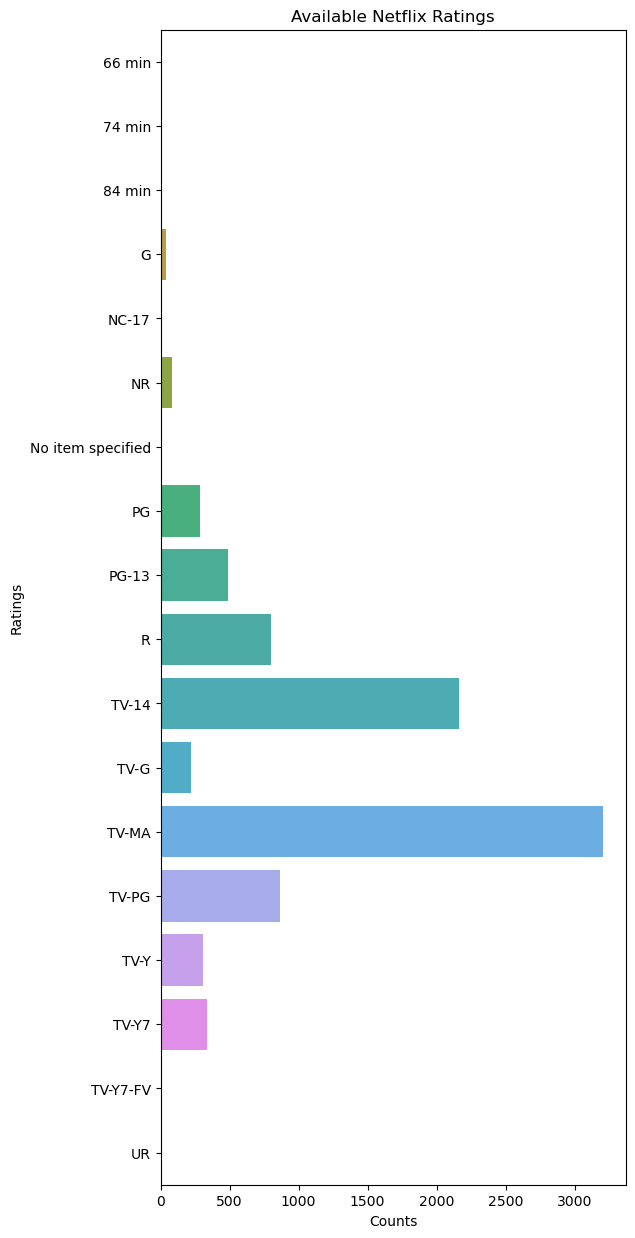

In [18]:
rating = df.groupby(['rating']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(6, 15))
sb.barplot(data=rating, y='rating', x='counts')
ax.set_xlabel('Counts')
ax.set_ylabel('Ratings')
ax.set_title("Available Netflix Ratings")


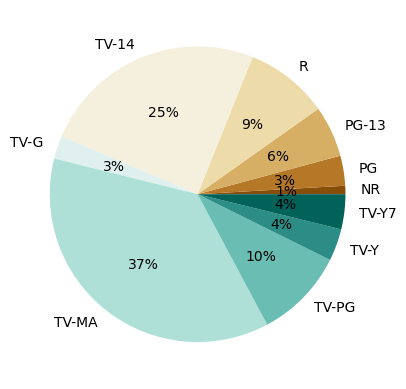

In [19]:
z = df.groupby(['rating']).size().reset_index(name='counts')

z = z[z.counts > 60]
colors = sb.color_palette("BrBG", n_colors=len(z))
plt.pie(data=z, x='counts', labels='rating', colors=colors, autopct='%.0f%%')
plt.show()

Number of Movies and TV shows in the dataset
----------------------------------------------------------------------------

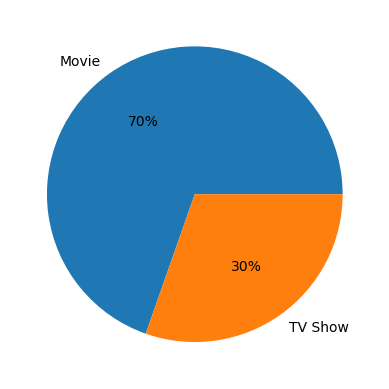

In [20]:
types = df['type'].value_counts()

colors = sb.color_palette()
plt.pie(data=types, x=types.values, labels=types.index, colors=colors, autopct='%.0f%%')
plt.show()

Netflix content production trend over the years
--------------------------------------------------------------

In [21]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns={"release_year": "Release Year"})
df2 = df1.groupby(['Release Year', 'type']).size().reset_index(name='Total Content')
df2 = df2[df2['Release Year'] >= 2010]

df2

,Release Year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


<Axes: xlabel='Release Year', ylabel='Total Content'>

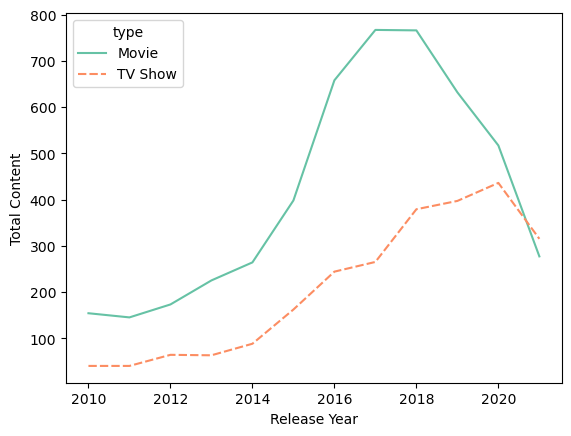

In [31]:
sb.lineplot(data=df2, x="Release Year", y="Total Content", hue='type', errorbar=None, legend="full", palette='Set2',
            style='type')

## Sentiment of content on Netflix

/var/folders/6q/q66rnwfd6b32sh0khdprycv80000gn/T/ipykernel_69199/2658029005.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx.loc[index, 'Sentiment'] = sentiment


Text(0, 0.5, 'Total Content')

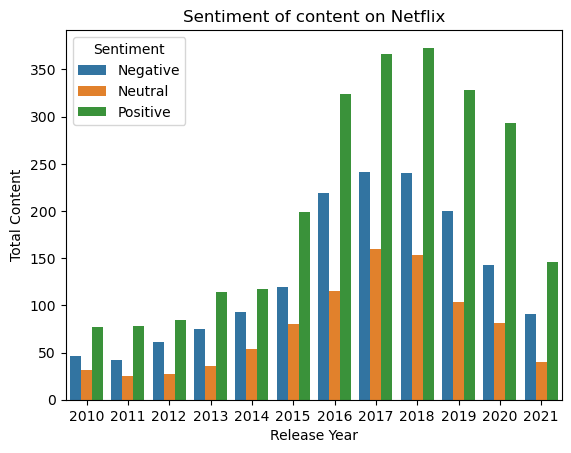

In [39]:
dfx = df[['release_year', 'description']]

for index, row_val in dfx.iterrows():
    descr = row_val['description']
    testimonial = TextBlob(descr)

    polarity = testimonial.sentiment.polarity
    if polarity == 0:
        sentiment = 'Neutral'
    elif polarity > 0:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'
    dfx.loc[index, 'Sentiment'] = sentiment

dfx = dfx.groupby(['release_year', 'Sentiment']).size().reset_index(name='total_content')
dfx = dfx[dfx['release_year'] >= 2010]

f, ax = plt.subplots()

sb.barplot(data=dfx, x='release_year', y='total_content', hue='Sentiment', palette=sb.color_palette(), ax=ax)
ax.set_title("Sentiment of content on Netflix")
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Content')


# fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")

### Top   10 Directors

In [24]:
filter_directors = df['director'].value_counts()
filter_directors = pd.DataFrame(filter_directors).reset_index()

filter_directors = filter_directors.rename(columns={'index': 'Directors', 'director': 'Total Count'})
filter_directors = filter_directors.sort_values(by="Total Count", ascending=False)
filter_directors = filter_directors[filter_directors['Directors'] != 'No item specified']


## Duration Stats

In [25]:
def remove_item(x) -> int:
    if x == 'No item specified':
        return 0
    return x


df = df[df['type'] == 'Movie']
df['duration'] = df.duration.map(lambda x: remove_item(x.rstrip('min'))).astype(int)


def stats_calc(df, sort_column='director', value_column='date_added'):
    df = df[[sort_column, value_column]].value_counts().reset_index()

    df_median = df.groupby(sort_column).median()
    df_median = df_median.rename(columns={value_column: 'median'}).reset_index()

    df_mean = df.groupby(sort_column).mean().round(1)
    df_mean = df_mean.rename(columns={value_column: 'mean {}'.format(value_column)}).reset_index()

    df_std = df.groupby(sort_column).std()
    df_std = df_std.rename(columns={value_column: 'std'}).reset_index()

    df = pd.merge(df_mean, df_std, on=[sort_column])
    df = pd.merge(df, df_median, on=[sort_column])[[sort_column, 'mean {}'.format(value_column), 'std', 'median']]
    df.sort_values(by=sort_column, inplace=True, ascending=False)
    return df


stats_calc(df, 'rating', 'duration')

,rating,mean duration,std,median
17,UR,108.0,7.071068,108.0
16,TV-Y7-FV,68.4,27.300183,68.0
15,TV-Y7,70.4,26.032693,73.0
14,TV-Y,53.8,25.204357,57.0
13,TV-PG,96.5,48.486933,96.0
12,TV-MA,102.1,48.092369,100.5
11,TV-G,77.1,40.753469,73.5
10,TV-14,113.1,52.919095,112.0
9,R,121.1,32.133430,118.5
8,PG-13,117.3,32.924525,116.0


### Stats of Directors and their movies

In [26]:
def return_statistics(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean,
                       'std in {}'.format(numerical_column): std})
    df.sort_values(by=categorical_column, inplace=True, ascending=False)
    # df.dropna(inplace = True)
    return df


In [27]:

return_statistics(df, 'director', 'duration')

,director,mean duration,std in duration
3847,Şenol Sönmez,99.0,1.414214
1431,Ömer Faruk Sorak,122.5,0.707107
797,Óskar Thór Axelsson,106.0,NaN
3145,Ísold Uggadóttir,102.0,NaN
3406,Çagan Irmak,112.0,NaN
...,...,...,...
1409,Aadish Keluskar,107.0,NaN
3645,A.R. Murugadoss,151.0,15.556349
1667,A. Salaam,134.0,NaN
2213,A. Raajdheep,117.0,NaN


In [28]:
stats_calc(df, 'listed_in', 'release_year')

,listed_in,mean release_year,std,median
277,Thrillers,2007.7,8.759984,2008.0
276,Stand-Up Comedy,2004.3,12.036480,2007.0
275,Sports Movies,2017.0,NaN,2017.0
274,"Sci-Fi & Fantasy, Thrillers",2013.5,5.089204,2014.5
273,Sci-Fi & Fantasy,2018.0,NaN,2018.0
...,...,...,...,...
4,"Action & Adventure, Anime Features, Horror Movies",2016.0,NaN,2016.0
3,"Action & Adventure, Anime Features, Classic Mo...",1980.0,1.414214,1980.0
2,"Action & Adventure, Anime Features, Children &...",2019.3,1.527525,2019.0
1,"Action & Adventure, Anime Features",2021.0,NaN,2021.0


In [29]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
listed_in       object
description     object
dtype: object

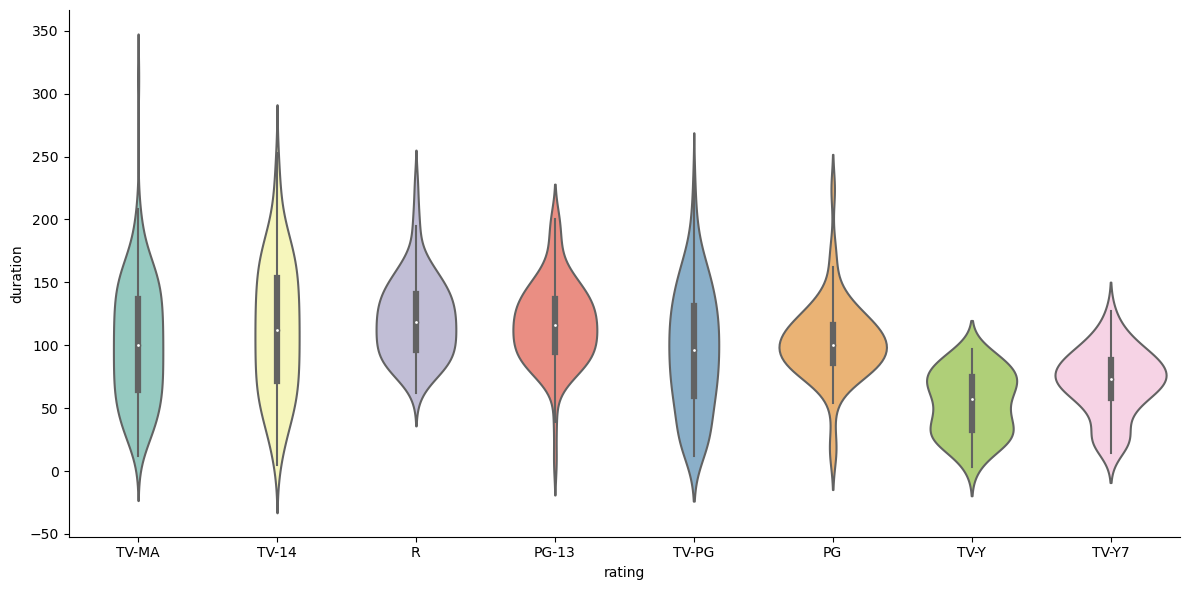

In [46]:
df_box = df[['rating', 'duration']].value_counts().reset_index().rename(columns={0: 'count'})
countries = df_box['rating'].unique().tolist()[:8]

df_box = df_box[df_box['rating'].isin(countries)]
df_box = df_box[~df_box['rating'].isin(['No item specified'])]
# df_box = df_box[df_box['release_year'] > 2000]
# melted_df = df_box.melt(id_vars=['director',],value_name="Durations")

# fig, ax = plt.subplots(figsize=(10.4, 4.8)) # default figsize (6.4, 4.8)

# sb.boxplot(data=df_box, x ='country', y='duration', ax=ax, palette='Set3')
sb.catplot(data=df_box, kind='violin', x='rating', y='duration', palette='Set3', sharey=True, aspect=2, height=6)

<Axes: title={'center': 'Movie year of released in top countries'}, xlabel='country', ylabel='release_year'>

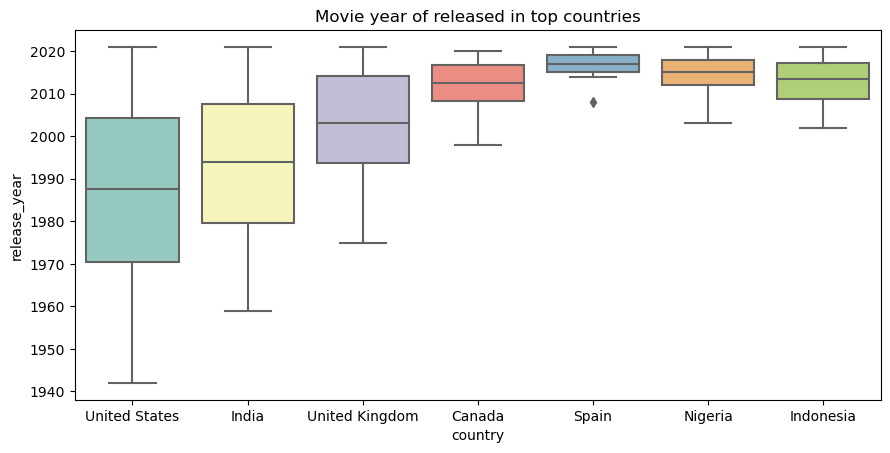

In [33]:
df_box = df[['country', 'release_year']].value_counts().reset_index().rename(columns={0: 'count'})
countries = df_box['country'].unique().tolist()[:8]

df_box = df_box[df_box['country'].isin(countries)]
df_box = df_box[~df_box['country'].isin(['No item specified'])]
# df_box = df_box[df_box['release_year'] > 2000]
# melted_df = df_box.melt(id_vars=['director',],value_name="Durations")

fig, ax = plt.subplots(figsize=(10.4, 4.8))  # default figsize (6.4, 4.8)
ax.set_title("Movie year of released in top countries")
sb.boxplot(data=df_box, x='country', y='release_year', ax=ax, palette='Set3')

In [34]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No item specified,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No item specified,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


<Axes: xlabel='rating', ylabel='listed_in'>

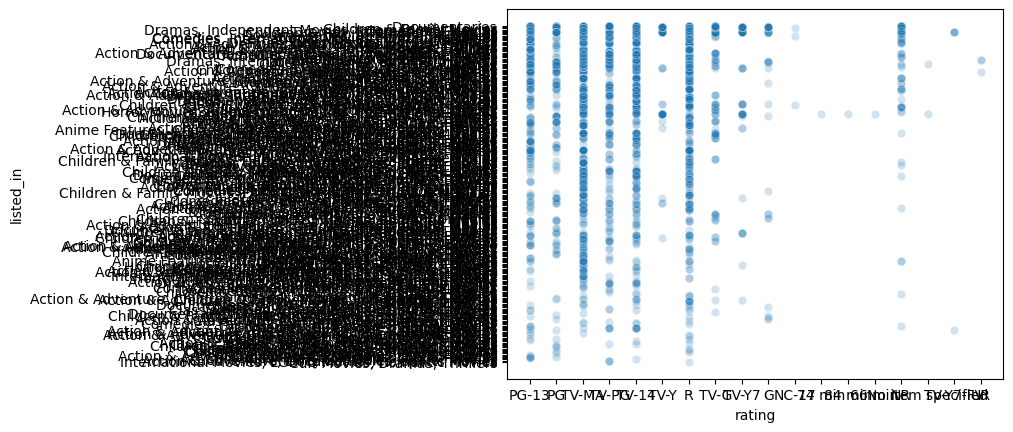

In [47]:
df_box = df[['country', 'release_year']].value_counts().reset_index().rename(columns={0: 'count'})
countries = df_box['country'].unique().tolist()[:8]

df_box = df_box[df_box['country'].isin(countries)]
df_box = df_box[~df_box['country'].isin(['No item specified'])]

sb.scatterplot(data=df, x='rating', y='listed_in', alpha=0.2)

In [36]:
df.corr()

,release_year,duration
release_year,1.000000,-0.206092
duration,-0.206092,1.000000
